In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from plot import plot_scatter_boundary

In [2]:
dataset = pd.read_csv('./data/dataset-linsep.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y[y == 0] = -1  # change all '0' labels to '-1'

In [3]:
# Split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3)

In [4]:
class Perceptron:
    def __init__(self, feature_len, learning_rate=0.05):
        self.weights = np.random.ranf(size=feature_len + 1)
        self.learning_rate = learning_rate

    def __str__(self):
        return 'W: {}'.format(self.weights)

    def predict(self, xs):
        return np.array([self.h(x) for x in xs])

    def h(self, x):
        return self.activation(self.dot(x))

    def dot(self, x):
        return np.dot(self.weights, np.append(x, 1))

    def activation(self, y_in):
        return np.sign(y_in)

    def functional_margin(self, x, y):
        return self.dot(x) * y

    def fit(self, x_train, y_train):
        mistake = True  # convergence criterion: No more mistakes on training data
        while mistake:
            mistake = False
            for x, y in zip(x_train, y_train):
                if self.functional_margin(x, y) <= 0:
                    mistake = True
                    self.weights += (np.append(x, 1) * y * self.learning_rate)

In [61]:
perceptron = Perceptron(2, 0.5)
print(perceptron)

W: [0.08316414 0.5737138  0.23384374]


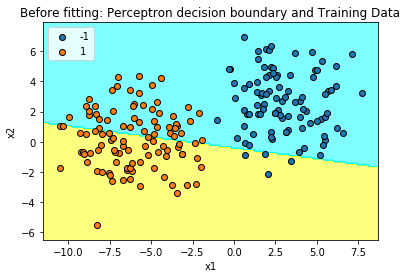

In [62]:
plot_scatter_boundary(perceptron, x_train, y_train, "Before fitting: Perceptron decision boundary and Training Data")
plt.show()

In [63]:
perceptron.fit(x_train, y_train)
print(perceptron)

W: [-2.68536375 -1.74639671 -0.76615626]


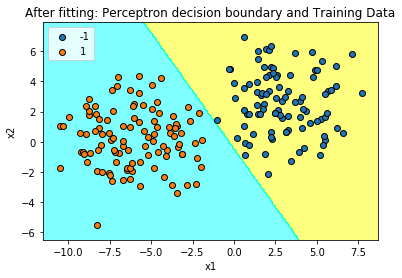

In [64]:
plot_scatter_boundary(perceptron, x_train, y_train, "After fitting: Perceptron decision boundary and Training Data")
plt.show()

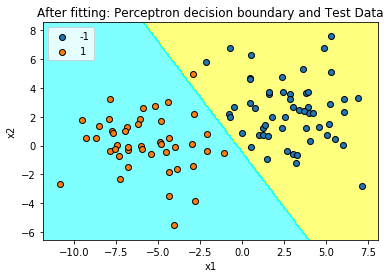

In [65]:
plot_scatter_boundary(perceptron, x_test, y_test, "After fitting: Perceptron decision boundary and Test Data")
plt.show()

In [66]:
predictions = perceptron.predict(x_test)
acc = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)
print('Accuracy: {0:.2f}%'.format(acc * 100))
print('Confusion Matrix:\n{}'.format(cm))

Accuracy: 99.00%
Confusion Matrix:
[[55  0]
 [ 1 44]]
